<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/main/%22%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%D1%8B_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B0_%D0%92%D0%92%D0%9F_%D0%98%D0%BD%D1%84_v8_0_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install openpyxl > con null 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pip install pandas openpyxl
!cp drive/MyDrive/Стажировка_РАН/Сводная_База_МЭП_DIMAR.xlsx ./
!cp drive/MyDrive/Стажировка_РАН/date_filtr_Обраб_Сводная_База_МЭП_DIMAR.xlsx ./


In [ ]:
!cp drive/MyDrive/Стажировка_РАН/Rank_VVP_features.xlsx ./

In [ ]:
!cp  drive/MyDrive/Стажировка_РАН/Rank_Inf_features.xlsx ./ 

### Загрузка базы данных и ранга параметров 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Задаем имена файлов и листов

file_path = 'date_filtr_Обраб_Сводная_База_МЭП_DIMAR.xlsx'
sheet_Base = 'База'
sheet_DicPar = 'Словарь_параметров'
NameData_row = 'Т'

# Читаем данные с листов
data = pd.read_excel(file_path, sheet_name=sheet_Base, index_col=0)
df_dic = pd.read_excel(file_path, sheet_name=sheet_DicPar)

#!!! Преозразуем инфляцию в зоны положительных чисел 
data['Y2'] = (data['Y2'] + 100) / 100

data.head()

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,...,Z80,Z84,Z96,Z97,Z98,Z99,Z100,Z101,Z102,Z103
Т,,,,,,,,,,,,,,,,,,,,,
2013-01-01,5456.667632,1.0097,100.9,850,1830.0,3372,427.3,511.4,269.7,3.6,...,2690.63,100.000000,59087.2129,14444,5456.667632,2202.70,7849.38,1.092678e+10,2908.98,5.660726e+10
2013-02-01,5456.667632,1.0056,100.8,863,1919.0,3031,391.9,652.5,284.1,2.9,...,2678.63,100.321494,67680.6465,13680,5456.667632,2202.71,7995.58,1.429568e+10,2918.63,5.018267e+10
2013-03-01,5456.667632,1.0034,100.5,925,2272.0,3439,429.3,741.5,385.8,3.9,...,2682.58,99.730395,72257.9989,12904,5456.667632,2202.72,8064.77,1.141143e+10,2688.17,5.101857e+10
2013-04-01,5835.960594,1.0051,100.2,915,2541.0,3506,417.1,771.6,399.7,3.7,...,2696.73,99.160994,73362.9039,12548,5835.960594,2202.73,7686.61,2.272075e+10,2397.30,5.984318e+10
2013-05-01,5835.960594,1.0066,100.0,885,2937.0,3812,425.1,987.0,449.0,3.4,...,2727.79,99.153420,66043.1814,12277,5835.960594,2202.74,7524.36,2.269822e+10,2279.33,4.457479e+10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      120 non-null    float64
 1   Y2      120 non-null    float64
 2   X1      120 non-null    float64
 3   X2      120 non-null    int64  
 4   X3      120 non-null    float64
 5   X4      120 non-null    int64  
 6   X5      120 non-null    float64
 7   X6      120 non-null    float64
 8   X7      120 non-null    float64
 9   X8      120 non-null    float64
 10  X9      120 non-null    float64
 11  X10     120 non-null    float64
 12  X11     120 non-null    float64
 13  X12     120 non-null    float64
 14  X13     120 non-null    float64
 15  X14     120 non-null    float64
 16  X15     120 non-null    float64
 17  X16     120 non-null    int64  
 18  X17     120 non-null    int64  
 19  X18     120 non-null    int64  
 20  X19     120 non-null    int64  
 21  X20     120 non-null

In [ ]:
#===============================================================================
# Создаем словарь с описанием столбцов
columns_with_description = df_dic.set_index('код параметра')['текстовое описание'].to_dict()
#===============================================================================
# Выполняем анализ содержания оставшейся базы
#summary = data.describe().T
summary = data.describe(percentiles=[]).T
# Добавляем текстовые описания столбцов
summary['текстовое описание'] = summary.index.map(columns_with_description)
# Выводим статистическую информацию
display(summary)


,count,mean,std,min,50%,max,текстовое описание
Y1,120.0,8.405503e+03,1.994423e+03,5.456668e+03,7.960305e+03,1.292767e+04,"Объем ВВП, млрд рублей"
Y2,120.0,1.005732e+00,8.402810e-03,9.946000e-01,1.004350e+00,1.076100e+00,"Инфляция, индекс %"
X1,120.0,1.030417e+02,4.623880e+00,8.860000e+01,1.027000e+02,1.211000e+02,1.3. Индекс производства продукции сельского х...
X2,120.0,1.202625e+03,2.330311e+02,8.500000e+02,1.170500e+03,1.817000e+03,1.4.1 Производство продуктов животноводства в ...
X3,120.0,2.576176e+03,4.429796e+02,1.794000e+03,2.559500e+03,3.333000e+03,1.4.2 Производство продуктов животноводства в ...
...,...,...,...,...,...,...,...
Z99,120.0,1.745369e+03,3.156193e+02,1.282660e+03,1.693365e+03,2.289340e+03,"ВВП в текущих долларах, млрд (1 вариант)"
Z100,120.0,1.555784e+04,7.500657e+03,5.948320e+03,1.455121e+04,3.819180e+04,Индекс МБ химии и нефтехимии
Z101,120.0,1.000018e+10,8.067149e+09,1.413727e+09,8.481583e+09,4.279365e+10,Объем торгов МБ химии и нефтехимии
Z102,120.0,5.788155e+03,2.654190e+03,2.004360e+03,5.708865e+03,1.198631e+04,Индекс металлов и добычи


In [ ]:
# Удаляем дублирующие параметры
data.drop('Z30', axis=1, inplace=True)
data.drop('Z32', axis=1, inplace=True)
data.drop('Z98', axis=1, inplace=True)
data.drop('Z99', axis=1, inplace=True)

In [ ]:
Rank_VVP_features = pd.read_excel("Rank_VVP_features.xlsx")
# Удаление строк, где значение столбца "Code" равно "Z30" или "Z40"
# Удаляем дублирующие параметры
Rank_VVP_features = Rank_VVP_features[~Rank_VVP_features["Code"].isin(["Z30"])]
# Сброс индекса
Rank_VVP_features = Rank_VVP_features.reset_index(drop=True)

display(Rank_VVP_features.head(70))  # выводим первые 20 строк


,Description,Code,Average Importance
0,"Индекс обрабатывающего производства по ОКВЭД2,...",Z70,1.000000
1,"1.12. Оборот розничной торговли, млрд рублей",X11,0.916951
2,1.13. Объем платных услуг населению (по данным...,X12,0.794163
3,Объем государственного внутреннего долга Росси...,Z58,0.768194
4,"Индекс промышленного производства по ОКВЭД2, с...",Z66,0.591994
...,...,...,...
65,"Объем торгов МБ металлов и добычи, руб.",Z103,0.024690
66,государственные гарантии Российской Федерации ...,Z59,0.021878
67,Учетная ставка,Z18,0.020007
68,"Всего внешний долг,экв. млн. долл. США",Z56,0.019941


Корреляционный анализ данных.

In [ ]:
Rank_Inf_features = pd.read_excel("Rank_Inf_features.xlsx")
Rank_Inf_features = Rank_Inf_features[~Rank_Inf_features["Code"].isin(["Z30"])]
# Сброс индекса
Rank_Inf_features = Rank_Inf_features.reset_index(drop=True)

display(Rank_Inf_features.head(40))  # выводим первые 40 строк



,Description,Code,Average Importance
0,3.5. Индекс потребительских цен (на конец пер...,X29,1.000000
1,"Цены на сырьевые товары: золото, руб./грамм.",Z9,0.352703
2,3.3.1. Сводный индекс цен на продукцию (затрат...,X26,0.189491
3,Акции АПК: Акрон,Z49,0.068723
4,Индекс металлов и добычи,Z102,0.050311
5,"Цены на сырьевые товары: алюминий, USD",Z14,0.038817
6,"Цены на сырьевые товары: платина, руб./грамм.",Z11,0.038270
7,Индекс нефти и газа,Z78,0.037225
8,3.2.4. Средние цены производителей на продукци...,X25,0.032341
9,Индекс МБ химии и нефтехимии,Z100,0.030511


In [ ]:
# Выбор первых 40 строк из Rank_Inf_features
Selected_Params_Inf = Rank_Inf_features.head(40)

# Выбор первых 70 строк из Rank_VVP_features
Selected_Params_VVP = Rank_VVP_features.head(70)

# Определение строк, которые присутствуют в первых 40 строках Rank_Inf_features,
# но отсутствуют в первых 70 строках Rank_VVP_features
not_in_vvp = Selected_Params_Inf[~Selected_Params_Inf["Code"].isin(Selected_Params_VVP["Code"])]
# Выборка параметров с кодами из not_in_vvp из Selected_Params_VVP
not_crossed_params = Rank_VVP_features[Rank_VVP_features["Code"].isin(not_in_vvp["Code"])]
# Добавление строк из not_in_vvp в Selected_Params_VVP
Selected_Params_VVP = pd.concat([Selected_Params_VVP, not_crossed_params], ignore_index=True)
del not_in_vvp 
# Сортировка по значимости (предположим, столбец "Importance" отражает значимость)
Selected_Params_VVP = Selected_Params_VVP.sort_values(by="Average Importance", ascending=False)
# Сброс индекса
Selected_Params_VVP = Selected_Params_VVP.reset_index(drop=True)

# Вывод результатов
print("Строки из первых 40 строк Rank_Inf_features, не входящие в первые 70 строк Rank_VVP_features:")
print(not_crossed_params)
print("\nОбновленный датафрейм Selected_Params_VVP (отсортирован по значимости и сброшен индекс):")
print(Selected_Params_VVP)

# Отобрать столбцы Code, которые есть в Selected_Params_VVP
columns_to_select = Selected_Params_VVP["Code"].tolist()
data_VVP = data[columns_to_select]

# Отобрать столбцы Code, которые есть в Selected_Params_VVP
columns_to_select = Selected_Params_Inf["Code"].tolist()
data_Inf = data[columns_to_select]

# Вывод результатов
print("Отобранный датафрейм data_VVP:")
print(data_VVP)

# Вывод результатов
print("Отобранный датафрейм data_VVP:")
print(data_Inf)



Строки из первых 40 строк Rank_Inf_features, не входящие в первые 70 строк Rank_VVP_features:
                                          Description Code  Average Importance
71                                 Обьем торгов, руб.  Z79            0.014184
76      Цены на сырьевые товары: платина, руб./грамм.  Z11            0.011029
79                  Сальдо внешней торговли, млн. USD  Z97            0.009302
85  3.5. Индекс потребительских цен  (на конец пер...  X29            0.004084
87                  Оборот внешней торговли, млн. USD  Z96            0.003021

Обновленный датафрейм Selected_Params_VVP (отсортирован по значимости и сброшен индекс):
                                          Description Code  Average Importance
0   Индекс обрабатывающего производства по ОКВЭД2,...  Z70            1.000000
1        1.12. Оборот розничной торговли, млрд рублей  X11            0.916951
2   1.13. Объем платных услуг населению (по данным...  X12            0.794163
3   Объем государственного

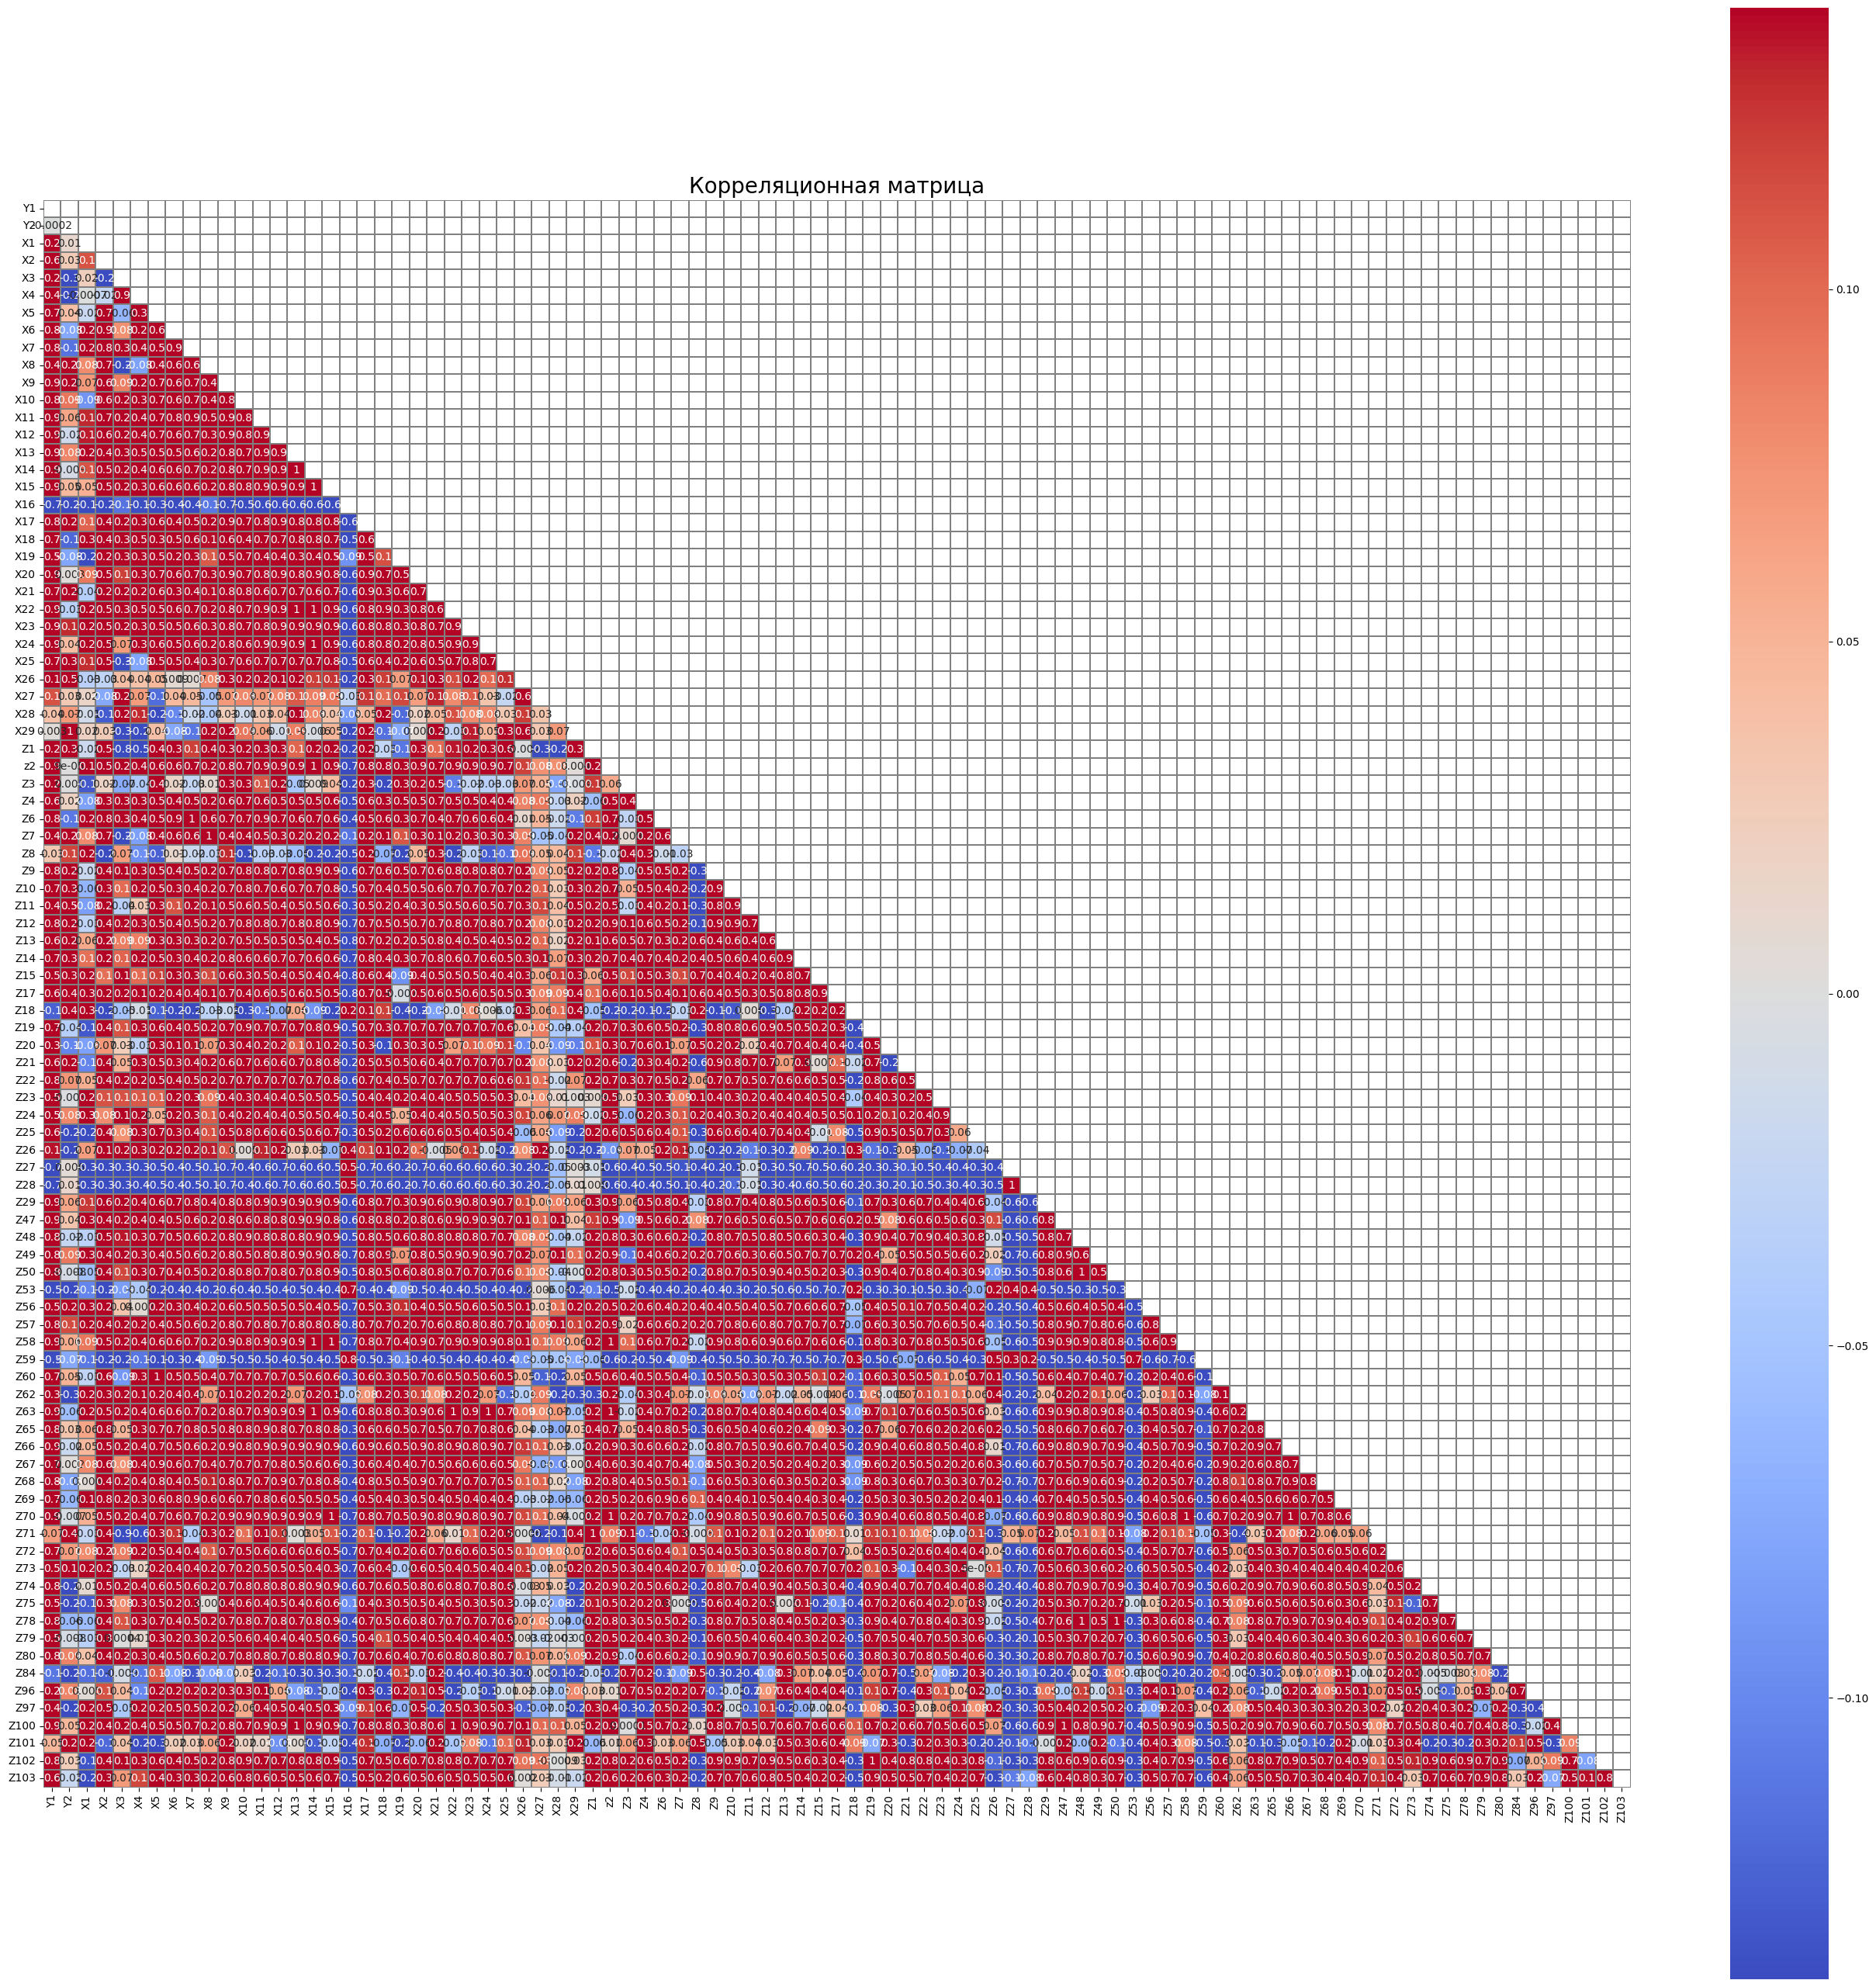

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(data.iloc[:, :].corr())
plt.figure(figsize=(33,33))
sb.heatmap(data.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.01, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()


In [ ]:
# Для ВВП 
y1 = data.iloc[:,0]    # Целевой столбец 1  ВВП
X1 = data_VVP.iloc[:,:]  # Входящие  данные для ВВП
# Добавление столбца y1 к X1 слева
X1 = pd.concat([y1, X1], axis=1)



# Для инфляции
y2 = data.iloc[:,1]    # Целевой столбец 2 Инфляция
X2 = data_Inf.iloc[:,:]  # Входящие  данные для ВВП
#X2 = data_Inf.iloc[:, [i for i in range(data_Inf.shape[1]) if i != 1]]  # Входящие данные для ВВП, исключая второй столбец
X2 = pd.concat([y2, X2], axis=1)




In [ ]:
!pip install xlsxwriter > null


In [ ]:
# Задаем имена файлов и листов
sheet_Base = 'База'
sheet_DicPar = 'Словарь_параметров'
sheet_RankUsedPar = 'Значимость_параметров'
NameData_row = 'Т'

# Читаем данные с листов
data = pd.read_excel(file_path, sheet_name=sheet_Base, index_col=0)
df_dic = pd.read_excel(file_path, sheet_name=sheet_DicPar)


X1.to_csv('/content/drive/MyDrive/Стажировка_РАН/models_VVP_76/data_in_for_VVP.csv', index=False)
X2.to_csv('/content/drive/MyDrive/Стажировка_РАН/models_Inf_41/data_in_for_Inf.csv', index=False)

# Создаем объект ExcelWriter и указываем имя файла
writer = pd.ExcelWriter('/content/drive/MyDrive/Стажировка_РАН/models_VVP_76/data_in_for_VVP.xlsx', engine='xlsxwriter')
# Записываем первый DataFrame в файл
X1.to_excel(writer, sheet_name=sheet_Base, index=False)
# Записываем словарь параметров в тот же файл, но на новом листе
df_dic.to_excel(writer, sheet_name=sheet_DicPar, index=False)
# Записываем ранк параметров  в тот же файл, но на еще одном новом листе
Selected_Params_VVP.to_excel(writer, sheet_name=sheet_RankUsedPar, index=False)
# Закрываем объект ExcelWriter
writer.close()


# Создаем объект ExcelWriter и указываем имя файла
writer1 = pd.ExcelWriter('/content/drive/MyDrive/Стажировка_РАН/models_Inf_41/data_in_for_Inf.xlsx', engine='xlsxwriter')
# Записываем первый DataFrame в файл
X2.to_excel(writer1, sheet_name=sheet_Base, index=False)
# Записываем второй DataFrame в тот же файл, но на новом листе
df_dic.to_excel(writer1, sheet_name=sheet_DicPar, index=False)
# Записываем третий DataFrame в тот же файл, но на еще одном новом листе
Selected_Params_Inf.to_excel(writer1, sheet_name=sheet_RankUsedPar, index=False)
# Закрываем объект ExcelWriter
writer1.close()





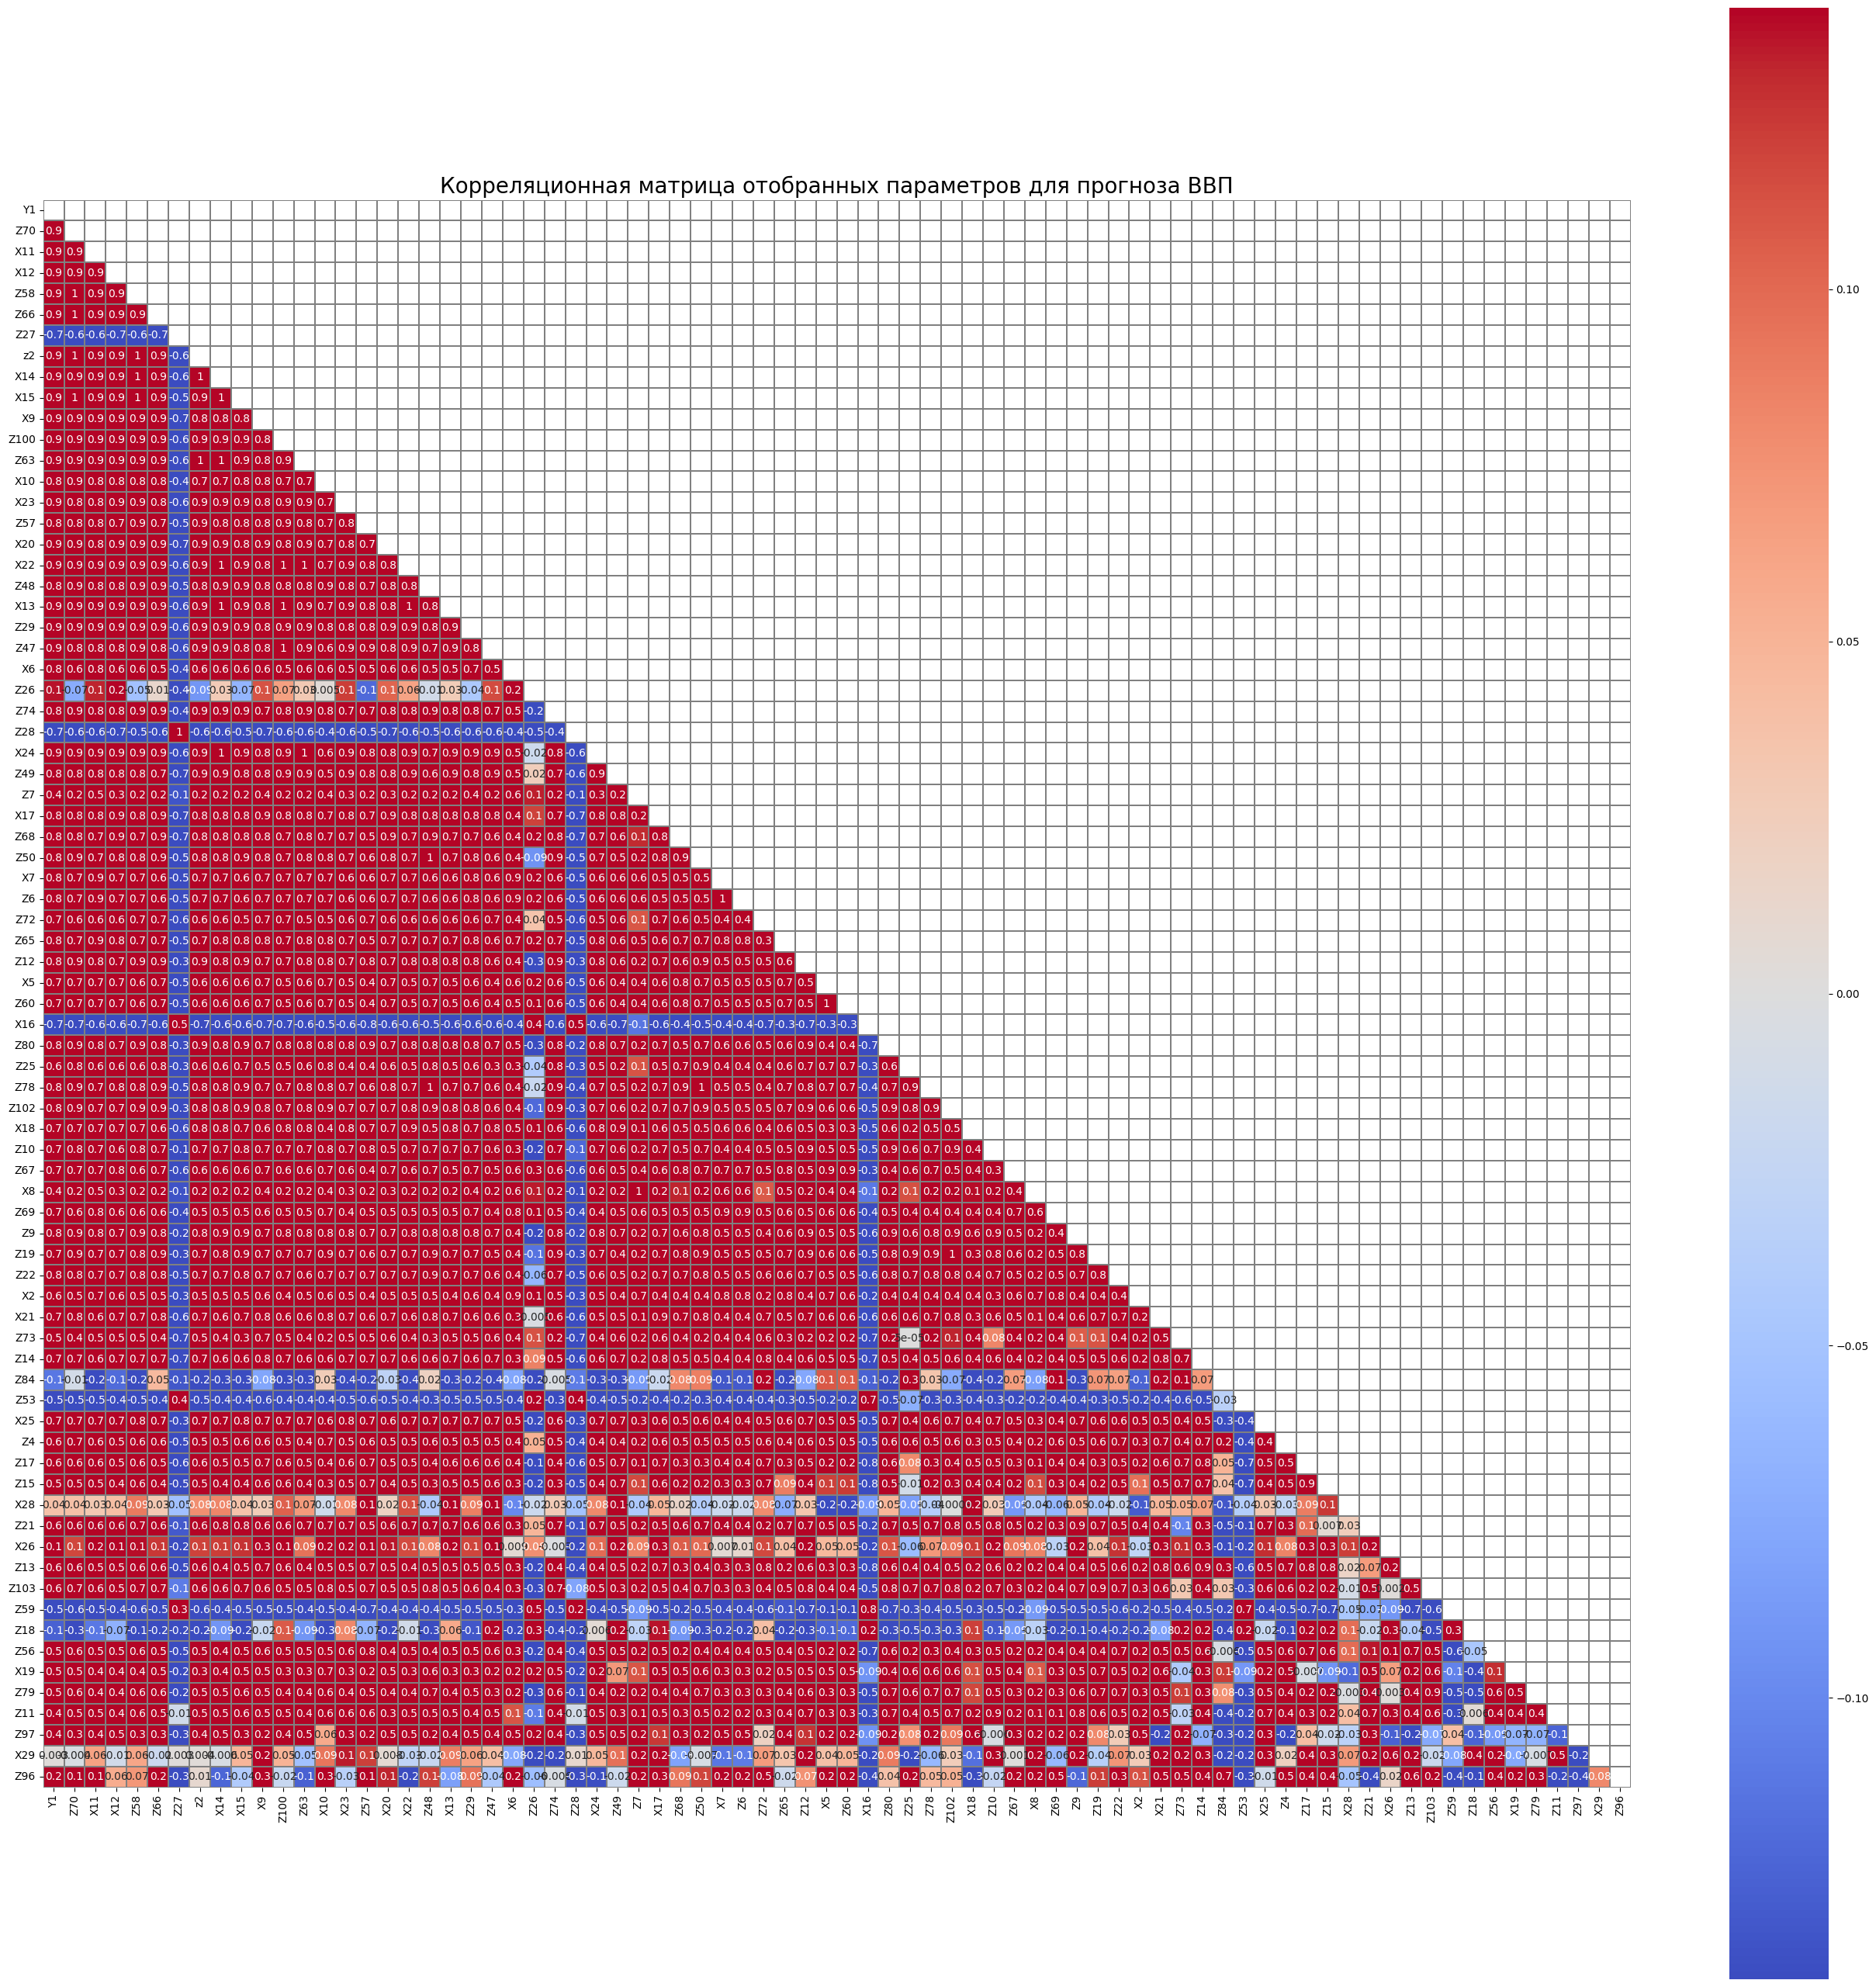

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(X1.iloc[:, :].corr())
plt.figure(figsize=(33,33))
sb.heatmap(X1.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.01, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица отобранных параметров для прогноза ВВП", fontsize=20)
plt.show()


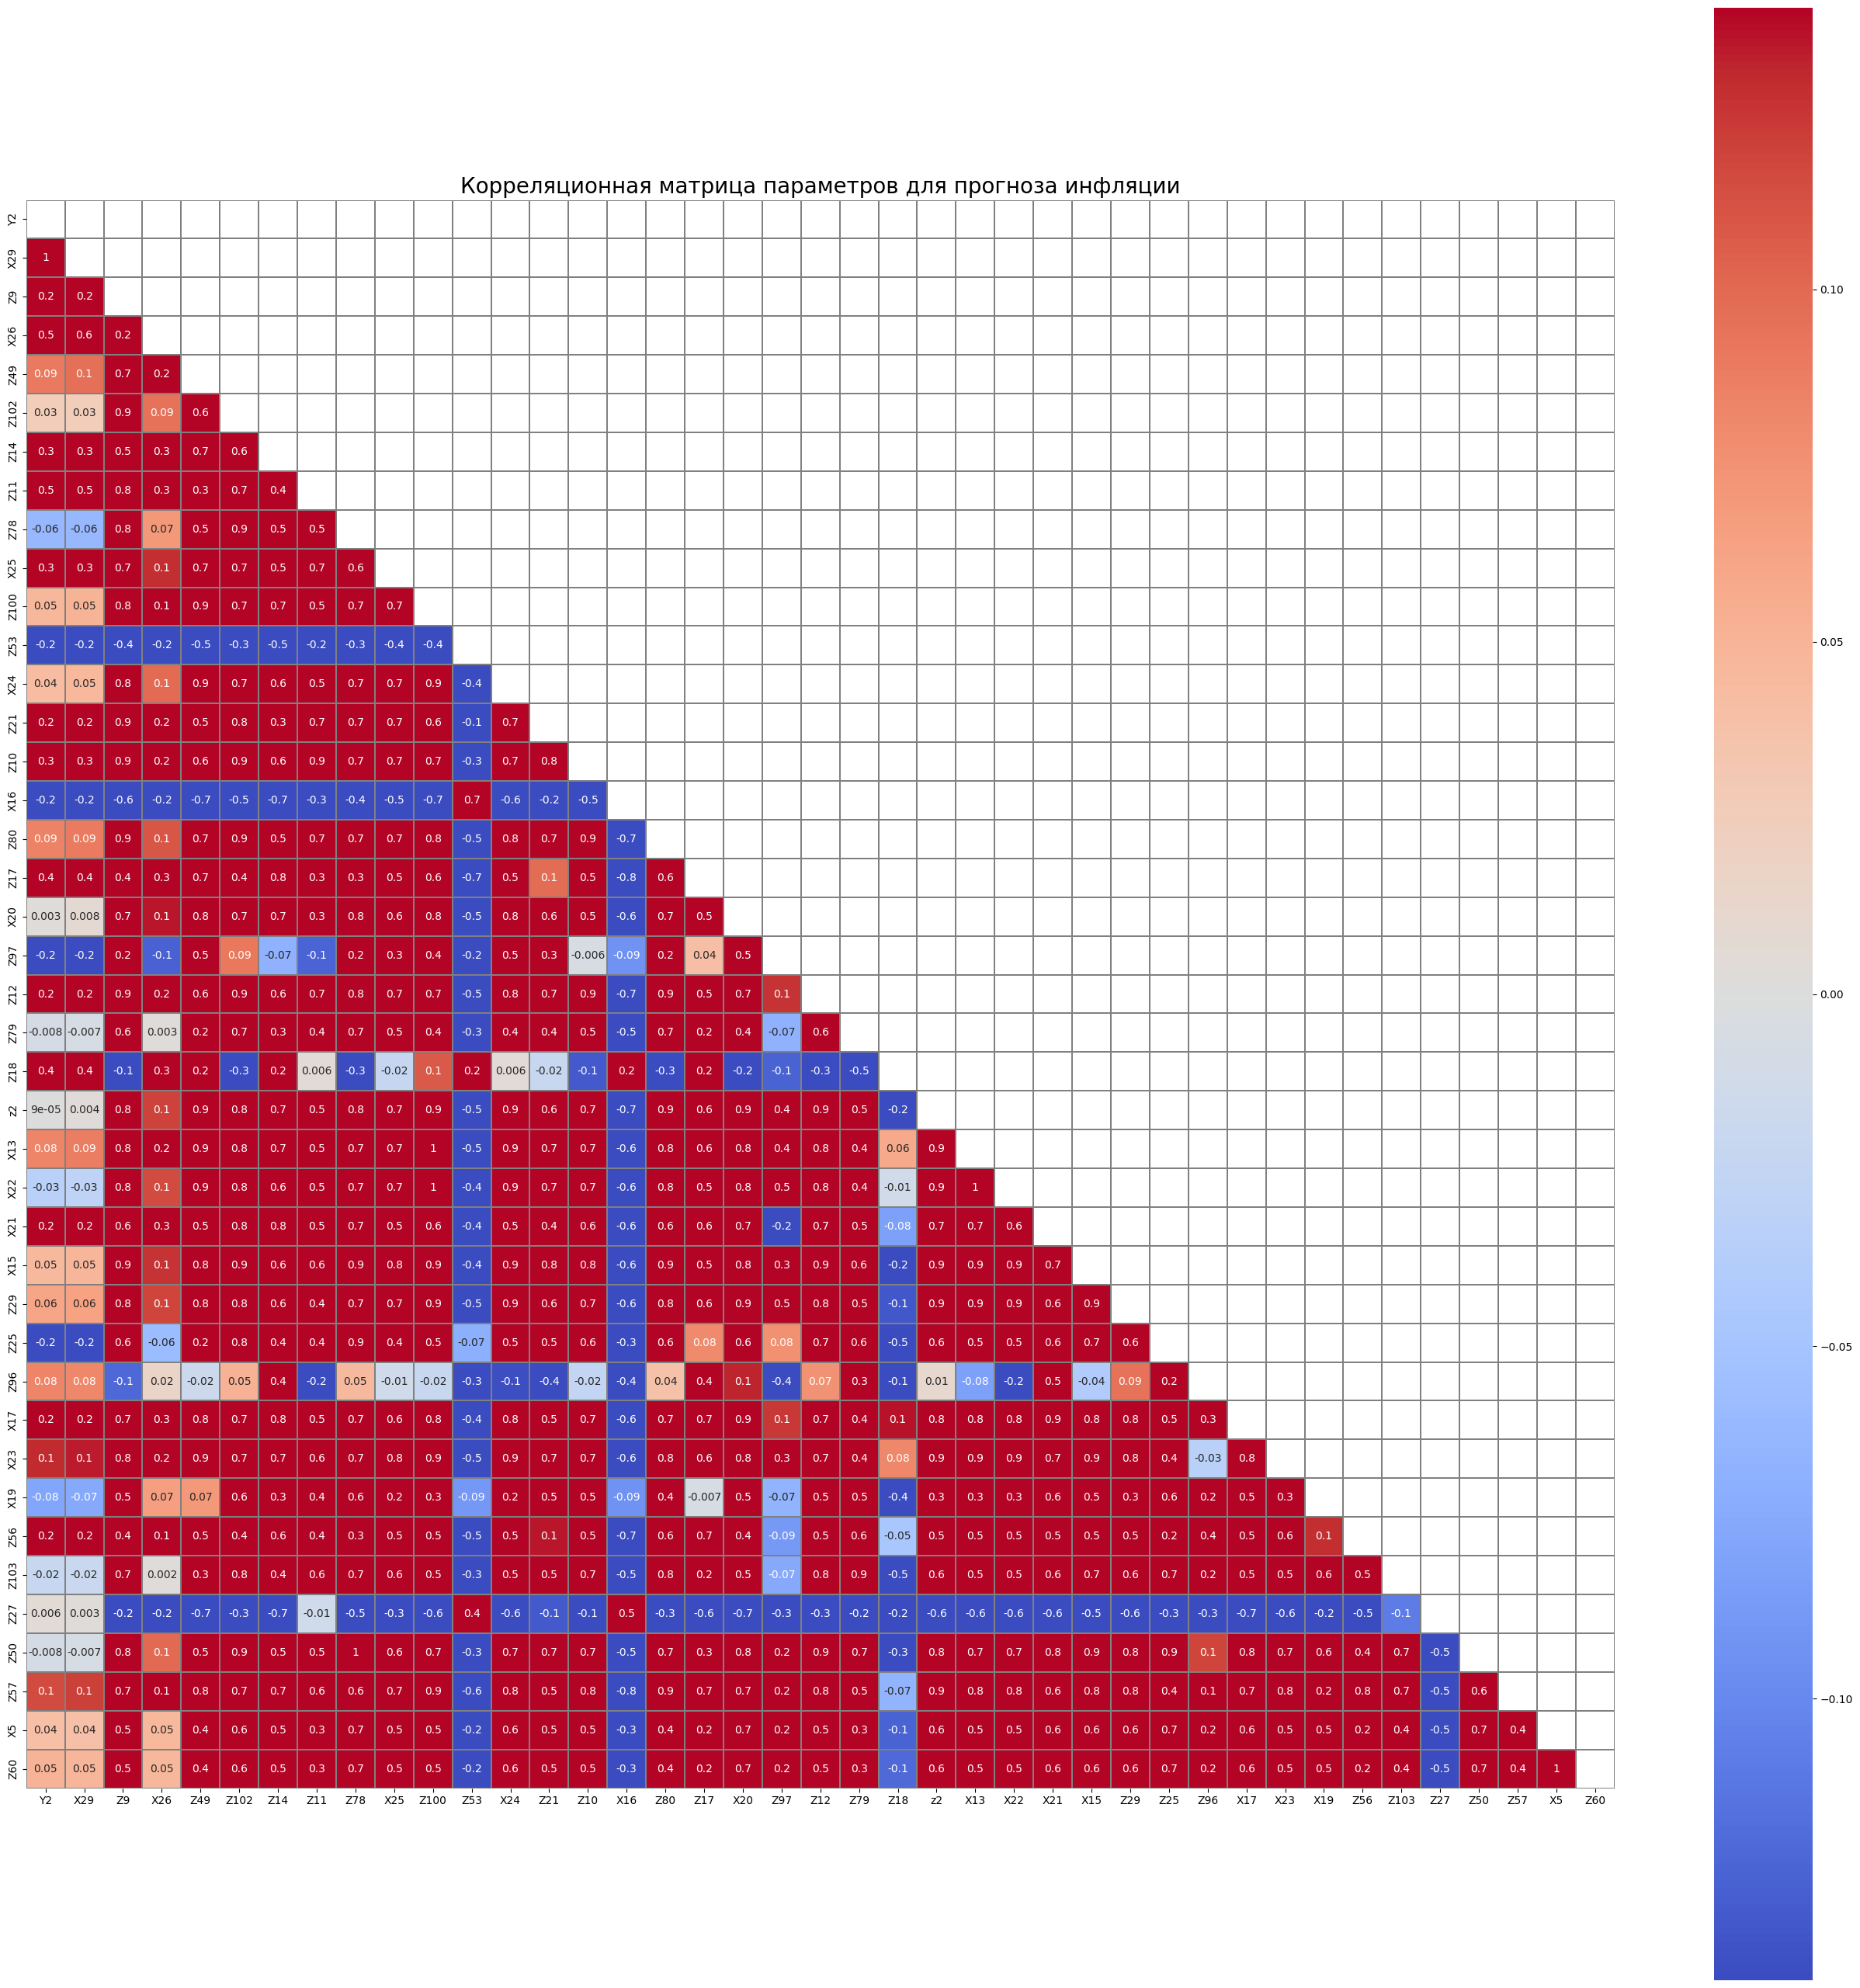

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# установка первого столбца в качестве индекса
#df_base.set_index(df_base.columns[0], inplace=True)

# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(X2.iloc[:, :].corr())
plt.figure(figsize=(33,33))
sb.heatmap(X2.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.01, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица параметров для прогноза инфляции", fontsize=20)
plt.show()


# 7.Модель Prophet

	Метод Prophet
Prophet - это процедурная модель для прогнозирования временных рядов, разработанная командой Facebook. Она основана на аддитивной модели, в которой нелинейные тренды приближаются к линейным компонентам. Prophet учитывает сезонность, праздники и другие факторы, которые могут повлиять на временные ряды. Основные особенности Prophet:

•	Обрабатывает изменения трендов и сезонность, а также аномальные значения.

•	Прост в использовании и не требует экспертных знаний в области временных рядов.

•	Позволяет задать сезонность и праздники вручную, что может улучшить качество прогнозов.

Prophet может быть использован для прогнозирования многих видов временных рядов, включая пропуски и аномальные значения. Он особенно хорошо подходит для данных с сильной сезонностью и изменяющимися трендами.


##7.1 Модель Prophet для ВВП

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6sj9i81/i940ge61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6sj9i81/lj7sl1a6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46191', 'data', 'file=/tmp/tmpj6sj9i81/i940ge61.json', 'init=/tmp/tmpj6sj9i81/lj7sl1a6.json', 'output', 'file=/tmp/tmpj6sj9i81/prophet_modelhx33nlaz/prophet_model-20230516043031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


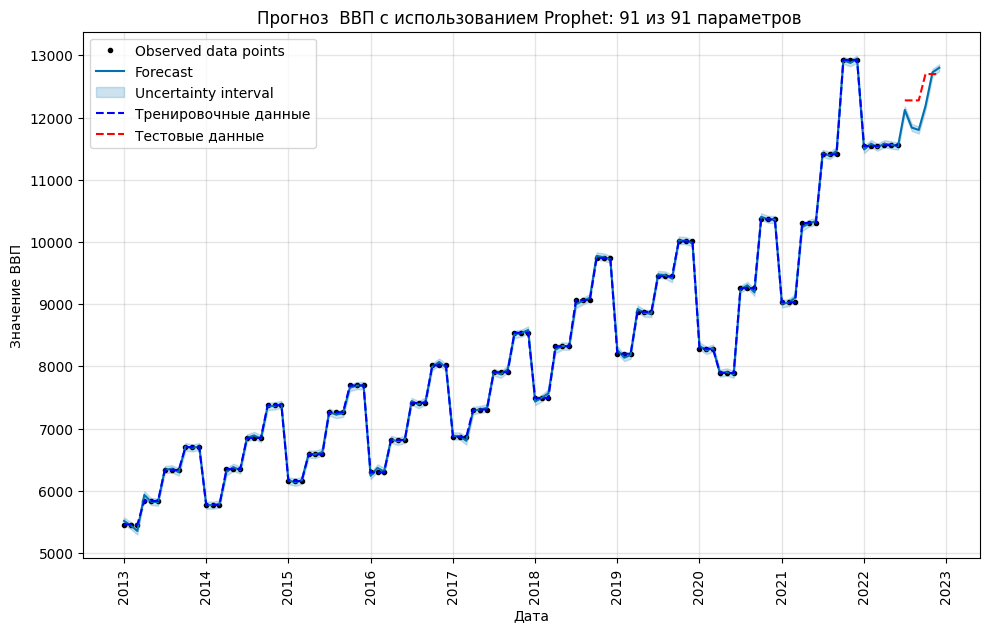

In [ ]:
#Проба модели типа Prophit!pip install prophet==1.1.2
import matplotlib.dates as mdates
import pandas as pd
from prophet import Prophet

# Создаем новый датафрейм с содеражащий заданое число столбцов из базы ранжированных параметров
X1r= pd.DataFrame(index=X1.index)
# Подготовка данных для модели Prophet
X1r['ds'] = X1.index
X1r['y'] = y1.values

# Получаем список имен столбцов из Rank_VVP_features
selected_columns = Rank_VVP_features['Code'].tolist()

# Задаем какое  количество столбцов будем учитывать в модели
K = 91  # Замените  на нужное количество столбцов
columns_to_add = selected_columns[:K]

# Добавляем столбцы из X1 с соответствующими именами столбцов
for col in columns_to_add:
    if col in X1.columns:
        X1r[col] = X1[col].values

# Разделение данных на обучающую и тестовую выборки
split_index = int(len(X1r) * 0.95)
train_df = X1r.iloc[:split_index]
test_df = X1r.iloc[split_index:]

# Дата сет подготовлен
# ______________________________________________________________________________
# Создание экземпляра модели Prophet и добавление дополнительных регрессоров.    
model = Prophet(interval_width=0.9)  # Устанавливаем ширину интервала неопределенности в 90%
for col in train_df.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)

model.fit(train_df)
#--------------------------------
# Прогнозирование на тестовой выборке

# Добавляем регрессоры из test_df
test_df = test_df.reset_index()
#for col in test_df.columns:
#    if col not in ['ds', 'y']:
#        future[col] = test_df[col]

# Прогнозируем
forecast1 = model.predict(X1r)
#--------------------------------
# Вывод графика с результатами прогноз
fig = model.plot(forecast1)

# Получаем объект Axes
ax = fig.gca()

# Устанавливаем название графика
ax.set_title(f"Прогноз  ВВП с использованием Prophet: {K} из 91 параметров ")

# Устанавливаем названия осей
ax.set_xlabel("Дата")
ax.set_ylabel("Значение ВВП")

# Устанавливаем шаг для делений на оси X
#ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Устанавливаем шаг для делений на оси Y
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# Устанавливаем шаг сетки по оси X в один год
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)

# Опционально: Устанавливаем формат даты для оси X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Поворачиваем подписи на оси X
plt.setp(ax.get_xticklabels(), rotation=90)
# Добавляем тренировочные и тестовые данные на график
ax.plot(train_df['ds'],train_df['y'], label="Тренировочные данные", color='blue', linestyle='--')
ax.plot(test_df['ds'], test_df['y'], label="Тестовые данные", color='red', linestyle='--')

# Добавляем легенду
ax.legend()
# Отображаем график
plt.show()


##7.2 Модель Prophet для  Инфляции

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6sj9i81/gmbiircr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6sj9i81/if4vbafm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45969', 'data', 'file=/tmp/tmpj6sj9i81/gmbiircr.json', 'init=/tmp/tmpj6sj9i81/if4vbafm.json', 'output', 'file=/tmp/tmpj6sj9i81/prophet_modelm662zwtj/prophet_model-20230516043033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,y,X29
Т,,,
2013-01-01,2013-01-01,1.0097,101.0
2013-02-01,2013-02-01,1.0056,100.6
2013-03-01,2013-03-01,1.0034,100.3
2013-04-01,2013-04-01,1.0051,100.5
2013-05-01,2013-05-01,1.0066,100.7
...,...,...,...
2021-08-01,2021-08-01,1.0017,100.2
2021-09-01,2021-09-01,1.0060,100.6
2021-10-01,2021-10-01,1.0111,101.1


,Т,ds,y,X29
0,2022-01-01,2022-01-01,0,101.0
1,2022-02-01,2022-02-01,0,101.2
2,2022-03-01,2022-03-01,0,107.6
3,2022-04-01,2022-04-01,0,101.6
4,2022-05-01,2022-05-01,0,100.1
5,2022-06-01,2022-06-01,0,99.7
6,2022-07-01,2022-07-01,0,99.6
7,2022-08-01,2022-08-01,0,99.5
8,2022-09-01,2022-09-01,0,100.1
9,2022-10-01,2022-10-01,0,100.2


,Т,ds,y,X29
0,2022-01-01,2022-01-01,1.0099,101.0
1,2022-02-01,2022-02-01,1.0117,101.2
2,2022-03-01,2022-03-01,1.0761,107.6
3,2022-04-01,2022-04-01,1.0156,101.6
4,2022-05-01,2022-05-01,1.0012,100.1
5,2022-06-01,2022-06-01,0.9965,99.7
6,2022-07-01,2022-07-01,0.9961,99.6
7,2022-08-01,2022-08-01,0.9948,99.5
8,2022-09-01,2022-09-01,1.0005,100.1
9,2022-10-01,2022-10-01,1.0018,100.2


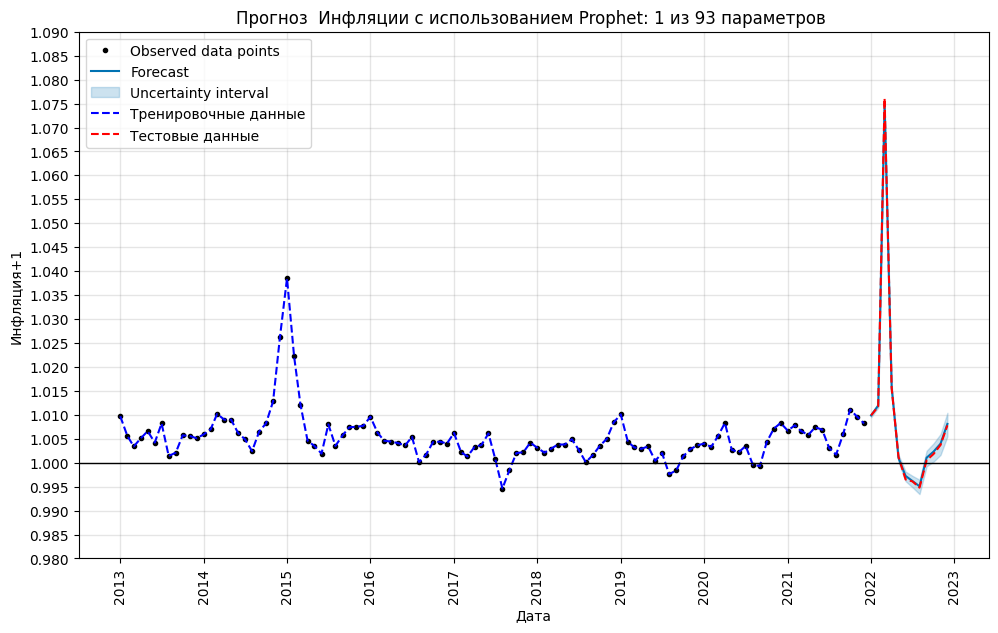

In [ ]:
#Проба модели типа Prophit!pip install prophet==1.1.2
import matplotlib.dates as mdates
import pandas as pd
from prophet import Prophet

# Создаем новый датафрейм с сожеражаизий заданое число столцова из базы ранжированны параметров
X2r= pd.DataFrame(index=X2.index)
# Подготовка данных для модели Prophet
X2r['ds'] = X2.index
X2r['y'] = y2.values

# Получаем список имен столбцов из Rank_Inf_features
selected_columns = Rank_Inf_features['Code'].tolist()
# Задаем какое  количество столбцов будем учитывать в модели
K = 1  # Замените  на нужное количество столбцов  из 91
def Model_Fit_Fig_Prphet(K=50):
 columns_to_add = selected_columns[:K]

# Добавляем столбцы из X2 с соответствующими именами столбцов
 for col in columns_to_add:
    if col in X2.columns:
        X2r[col] = X2[col].values

# Разделение данных на обучающую и тестовую выборки
 split_index = int(len(X2r) * 0.9)
 train_df = X2r.iloc[:split_index]
 test_df = X2r.iloc[split_index:]

# Дата сет подготовлен
# ______________________________________________________________________________
# Создание экземпляра модели Prophet и добавление дополнительных регрессоров.    
 model = Prophet(interval_width=0.9)  # Устанавливаем ширину интервала неопределенности в 90% 
 for col in train_df.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)

 model.fit(train_df)
 display(train_df)
#--------------------------------
# Прогнозирование на тестовой выборке

# Добавляем регрессоры из test_df
 test_df = test_df.reset_index()
 #for col in test_df.columns:
 #   if col not in ['ds', 'y']:
 #       future[col] = test_df[col]

# Прогнозируем
 forecast=[]
 #forecast = model.predict(X2r)
 test_df1=test_df.copy()
 test_df1['y'] = 0
 #test_df1['X29'] = 0
 forecast = model.predict(test_df1)
 display(test_df1)
 display(test_df)
#--------------------------------
# Вывод графика с результатами прогноз
 fig = model.plot(forecast)

# Получаем объект Axes
 ax = fig.gca()

# Устанавливаем название графика
 ax.set_title(f"Прогноз  Инфляции с использованием Prophet: {K} из 93 параметров ")

# Устанавливаем названия осей
 ax.set_xlabel("Дата")
 ax.set_ylabel("Инфляция+1")

# Устанавливаем шаг для делений на оси X
#ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Устанавливаем шаг для делений на оси Y
 ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# Устанавливаем шаг сетки по оси X в один год
 years = mdates.YearLocator()
 ax.xaxis.set_major_locator(years)
# Опционально: Устанавливаем формат даты для оси X
 ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Поворачиваем подписи на оси X
 plt.setp(ax.get_xticklabels(), rotation=90)
# Добавляем тренировочные и тестовые данные на график
 ax.plot(train_df['ds'],train_df['y'], label="Тренировочные данные", color='blue', linestyle='--')
 ax.plot(test_df['ds'], test_df['y'], label="Тестовые данные", color='red', linestyle='--')
# Добавляем легенду
 ax.legend()

# Задаем шаг делений на оси Y
 ax.yaxis.set_major_locator(plt.MultipleLocator(0.005))  # Задайте значение шага, которое вам нужно
# Задаем диапазон графика по оси Y
 ax.set_ylim(0.98, 1.09)  # Задайте значения нижней и верхней границ диапазона

# Отрисовываем ось X на уровне 0
 ax.axhline(y=1, color='k', linewidth=1)
# Отображаем график
 plt.show()
Model_Fit_Fig_Prphet(K=K)

#8.Модель на базе нейронной сети LSTM

Для прогнозирования ВВП РФ (Y1) и инфляции (Y2), рекомендуется использовать LSTM или модель Transformer. Оба подхода обладают преимуществами для анализа и прогнозирования временных рядов, как указано ниже:
*   LSTM: Долгосрочная краткосрочная память (Long Short-Term Memory, LSTM) - эторазновидность рекуррентных нейронных сетей (RNN), которая специально разработана для обработки долгосрочных зависимостей в данных. LSTM обеспечивает лучшую производительность по сравнению с обычными RNN для прогнозирования временных рядов, так как они могут обучаться на данных с долгосрочными зависимостями и уменьшать проблему затухающих градиентов.
*   Transformer: Модели Transformer, такие как BERT, являются современными архитектурами, которые обеспечивают высокую производительность для анализа временных рядов. Они могут улавливать сложные зависимости в данных, так как используют механизмы внимания для взвешивания различных входных данных. Это может быть полезно для прогнозирования ВВП и инфляции, которые могут быть связаны с множеством входных параметров (X1 до X70).

В целом, рекомендуется начать с использования LSTM, так как они обычно проще в реализации и обучении по сравнению с моделями Transformer. Однако, если вы хотите использовать более продвинутую модель, которая может улавливать более сложные зависимости, рассмотрите возможность использования модели Transformer.



In [ ]:
# Варианты функций для подготовки обучаещго датасета
# Преобразование данных в окна временных рядов
def _create_dataset(datasetX,datasetY, window_size=12):
    dataX, dataY = [], []
    for i in range(len(datasetX) - window_size):
        #dataX.append(dataset[i:(i + window_size), 1:])
        dataX.append(datasetX[i:(i + window_size), :])
        dataY.append(datasetY[i:(i + window_size), :])
        #dataY.append(datasetY[i + window_size, :])
    return np.array(dataX), np.array(dataY)

def create_dataset(X, y, window_size=1):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:(i + window_size), :])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)

def create_dataset_multi_step(X, y, window_size, steps_ahead):
    X_data, y_data = [], []
    for i in range(len(X) - window_size - steps_ahead ):
        X_data.append(X[i:i + window_size])
        y_data.append(y[i+1+ window_size: i+1 + window_size + steps_ahead])
    return np.array(X_data), np.array(y_data)


def create_dataset_one_step(X, y, window_size,start_ahead, steps_ahead):
    X_data, y_data = [], []
    for i in range(len(X) - window_size - steps_ahead ):
        X_data.append(X[i:i + window_size])
        y_data.append(y[i+window_size+start_ahead: i + window_size + steps_ahead])
    return np.array(X_data), np.array(y_data)



##8.1  LSTM  модель  для ВВП по выбранным параметрам

###8.1.1  Подготовка дата сета

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Создание классов для масштабирование данных
#scaler = MinMaxScaler()
scalerX_VVP = StandardScaler()
scalerY_VVP = StandardScaler()

In [ ]:
#Nparam = 40
ValidTestPart=0.15
Ndrop_out=120
swap_trai_val=False
swap_trai_val=True
#Xin = X1.iloc[:, :Nparam]  # Входящие данные для ВВП . Включим в X сами значения прогнозируемых параметров
Xin = X1.iloc[:, :]  # Входящие данные для ВВП . Включим в X сами значения прогнозируемых параметров
yin = y1.iloc[:]  # Целевой столбец  ВВП
Nparam=Xin.shape[1]
# Создайте переменную timestamps с временными метками
timestamps = data.index

# Масштабирование данных
scaled_dataX = scalerX_VVP.fit_transform(Xin)
# Выделяем  новый скалер только для первого столбца (Y1)
scaler_first_column = StandardScaler()
scalerY_VVP.mean_ = scalerX_VVP.mean_[0].reshape(-1, 1)
scalerY_VVP.var_ = scalerX_VVP.var_[0].reshape(-1, 1)
scalerY_VVP.scale_ = scalerX_VVP.scale_[0].reshape(-1, 1)

scaled_dataY= (scaled_dataX[:,0]) #.reshape(-1, 1)
#Проверка
original_data = scalerY_VVP.inverse_transform(scaled_dataY.reshape(-1,1))

# Отсечем турбулентный участок
scaled_dataX=scaled_dataX[:Ndrop_out,:]
scaled_dataY=scaled_dataY[:Ndrop_out]
timestamps=timestamps[:Ndrop_out]


if (swap_trai_val==False):
   X_train_temp, X_val_temp,y_train_temp, y_val_temp, index_train_temp, timestamp_index_val = train_test_split(scaled_dataX, scaled_dataY, timestamps, test_size=ValidTestPart, shuffle=False)
else :
   X_val_temp,X_train_temp, y_val_temp, y_train_temp, timestamp_index_val, index_train_temp = train_test_split(scaled_dataX, scaled_dataY, timestamps, test_size=1-ValidTestPart, shuffle=False)


# Создание датафреймов для обучающей, валидационной и тестовой выборок с учетом временных меток
train_df = pd.DataFrame(y_train_temp, index=index_train_temp, columns=['Y1'])
val_df = pd.DataFrame(y_val_temp, index=timestamp_index_val, columns=['Y1'])

train_df_x = pd.DataFrame(X_train_temp, index=index_train_temp, columns=Xin.columns)
val_df_x = pd.DataFrame(X_val_temp, index=timestamp_index_val, columns=Xin.columns)


In [ ]:
# Нарезка слайсов
window_size = 12
start_ahead = 5
steps_ahead = 6

X, y = create_dataset_one_step(scaled_dataX, scaled_dataY, window_size, start_ahead, steps_ahead)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= ValidTestPart , shuffle=False)
#if (swap_trai_val==False):  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= ValidTestPart , shuffle=False)
#else:  X_val, X_train, y_val , y_train = train_test_split(X, y, test_size=1-ValidTestPart, shuffle=False)


for item1, y_transformed_val in zip(y, scalerY_VVP.inverse_transform(y.reshape(-1, 1))):
    print(item1, ' \t', y_transformed_val)

[-1.03592182]  	 [6348.06312927]
[-0.78420268]  	 [6848.0013924]
[-0.78420268]  	 [6848.0013924]
[-0.78420268]  	 [6848.0013924]
[-0.51794346]  	 [7376.81762478]
[-0.51794346]  	 [7376.81762478]
[-0.51794346]  	 [7376.81762478]
[-1.13264032]  	 [6155.97093482]
[-1.13264032]  	 [6155.97093482]
[-1.13264032]  	 [6155.97093482]
[-0.91729282]  	 [6583.67166266]
[-0.91729282]  	 [6583.67166266]
[-0.91729282]  	 [6583.67166266]
[-0.5753196]  	 [7262.86313503]
[-0.5753196]  	 [7262.86313503]
[-0.5753196]  	 [7262.86313503]
[-0.35860404]  	 [7693.28095245]
[-0.35860404]  	 [7693.28095245]
[-0.35860404]  	 [7693.28095245]
[-1.06261881]  	 [6295.04036095]
[-1.06261881]  	 [6295.04036095]
[-1.06261881]  	 [6295.04036095]
[-0.79960468]  	 [6817.41154841]
[-0.79960468]  	 [6817.41154841]
[-0.79960468]  	 [6817.41154841]
[-0.50037762]  	 [7411.70507447]
[-0.50037762]  	 [7411.70507447]
[-0.50037762]  	 [7411.70507447]
[-0.19685116]  	 [8014.53761664]
[-0.19685116]  	 [8014.53761664]
[-0.19685116]  	

###8.1.2  Создание модели

In [ ]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.optimizers import Adam
model = Sequential([
    LSTM(int(1*Nparam), input_shape=(window_size, X_train.shape[2]), return_sequences=False),
    Dropout(0.40),
   # LSTM(2, return_sequences= False),
   # Dropout(0.3),
    Dense(Nout * (steps_ahead-start_ahead)),
    #Reshape(((steps_ahead-start_ahead), Nout))
])


###8.1.3  Обучение модели

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

#from tensorflow.keras.callbacks import ReduceLROnPlateau
initial_learning_rate = 0.001
epochs = 2*80
# Создаем оптимизатор Adam с начальным значением скорости обучения
optimizer = Adam(learning_rate=initial_learning_rate)

#RMSprop: Это оптимизатор, который применяет адаптивные скорости обучения для каждого параметра. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

#SGD: Стохастический градиентный спуск - классический оптимизатор для обучения нейронных сетей. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9)

#Adagrad: Этот оптимизатор адаптирует скорость обучения для каждого параметра на основе истории градиентов. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)

#Adadelta: Этот оптимизатор также адаптирует скорость обучения на основе истории градиентов, но с использованием нескольких последних градиентов. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
# Компилируем модель с оптимизатором Adam
#model.compile(optimizer=optimizer, loss='mse')

model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 76)                46512     
                                                                 
 dropout_3 (Dropout)         (None, 76)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 77        
                                                                 
Total params: 46,589
Trainable params: 46,589
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Калбэк функция для сохранения лучших моделей
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback

class SaveBestModelWithValLoss(Callback):
    def __init__(self, output_dir):
        super().__init__()
        self.output_dir = output_dir
        self.best_val_loss = float("inf")

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_loss = logs.get("val_loss")
        if val_loss is not None and val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            model_path = os.path.join(self.output_dir, f"best_model_nparam_{Nparam}_val_loss_{val_loss:.5f}_epoch_{epoch}.h5")
            self.model.save(model_path)
            print(f"Model saved as {model_path}")

# Создайте экземпляр класса SaveBestModelWithValLoss
save_best_model_with_val_loss = SaveBestModelWithValLoss(output_dir=f"/content/drive/MyDrive/Стажировка_РАН/models_VVP_{Nparam}")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, verbose=1, min_lr=1e-6)



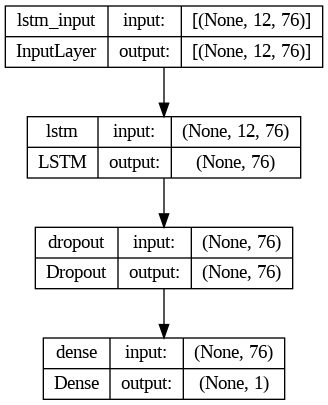

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=f"/content/drive/MyDrive/Стажировка_РАН/models_VVP_{Nparam}/best_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_VVP.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

#history = model.fit(X_train, y_train, epochs=80, batch_size=1, validation_data=(X_val, y_val), callbacks=[reduce_lr,  model_checkpoint, save_best_model_with_val_loss])
history = model.fit(X_train, y_train, epochs=80, batch_size=1, validation_data=(X_val, y_val), callbacks=[  model_checkpoint, save_best_model_with_val_loss])
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_val, y_val), callbacks=[reduce_lr, model_checkpoint, save_best_model_with_val_loss])

#model.load('best_model_VVP.h5')
model.load_weights('best_model_VVP.h5')



Epoch 1/80
 2/86 [..............................] - ETA: 2:15 - loss: 0.0364

84/86 [============================>.] - ETA: 0s - loss: 0.3029
Epoch 1: val_loss improved from inf to 1.63365, saving model to best_model_VVP.h5
86/86 [==============================] - 7s 58ms/step - loss: 0.2973 - val_loss: 1.6337
Epoch 2/80
86/86 [==============================] - ETA: 0s - loss: 0.1936
Epoch 2: val_loss improved from 1.63365 to 0.99621, saving model to best_model_VVP.h5
86/86 [==============================] - 1s 10ms/step - loss: 0.1936 - val_loss: 0.9962
Epoch 3/80
77/86 [=========================>....] - ETA: 0s - loss: 0.1617
Epoch 3: val_loss improved from 0.99621 to 0.12113, saving model to best_model_VVP.h5
Model saved as /content/drive/MyDrive/Стажировка_РАН/models_VVP_76/best_model_nparam_76_val_loss_0.12113_epoch_2.h5
86/86 [==============================] - 3s 31ms/step - loss: 0.1536 - val_loss: 0.1211
Epoch 4/80
84/86 [============================>.] - ETA: 0s - loss: 0.1284
Epoch 4: val_loss did not improve from 0.12113
86/86 [=======================

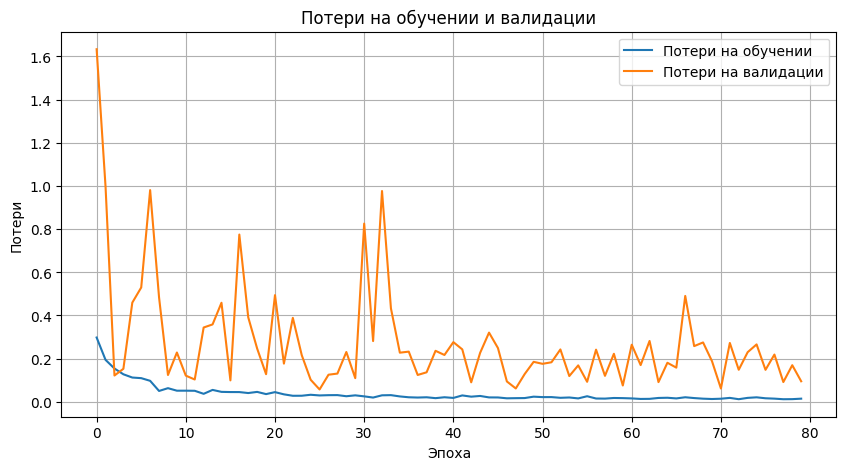

In [ ]:
# Вывод графика результатов обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери на обучении и валидации')
plt.grid()
plt.show()

###8.1.4  Вывод графиков прогноза

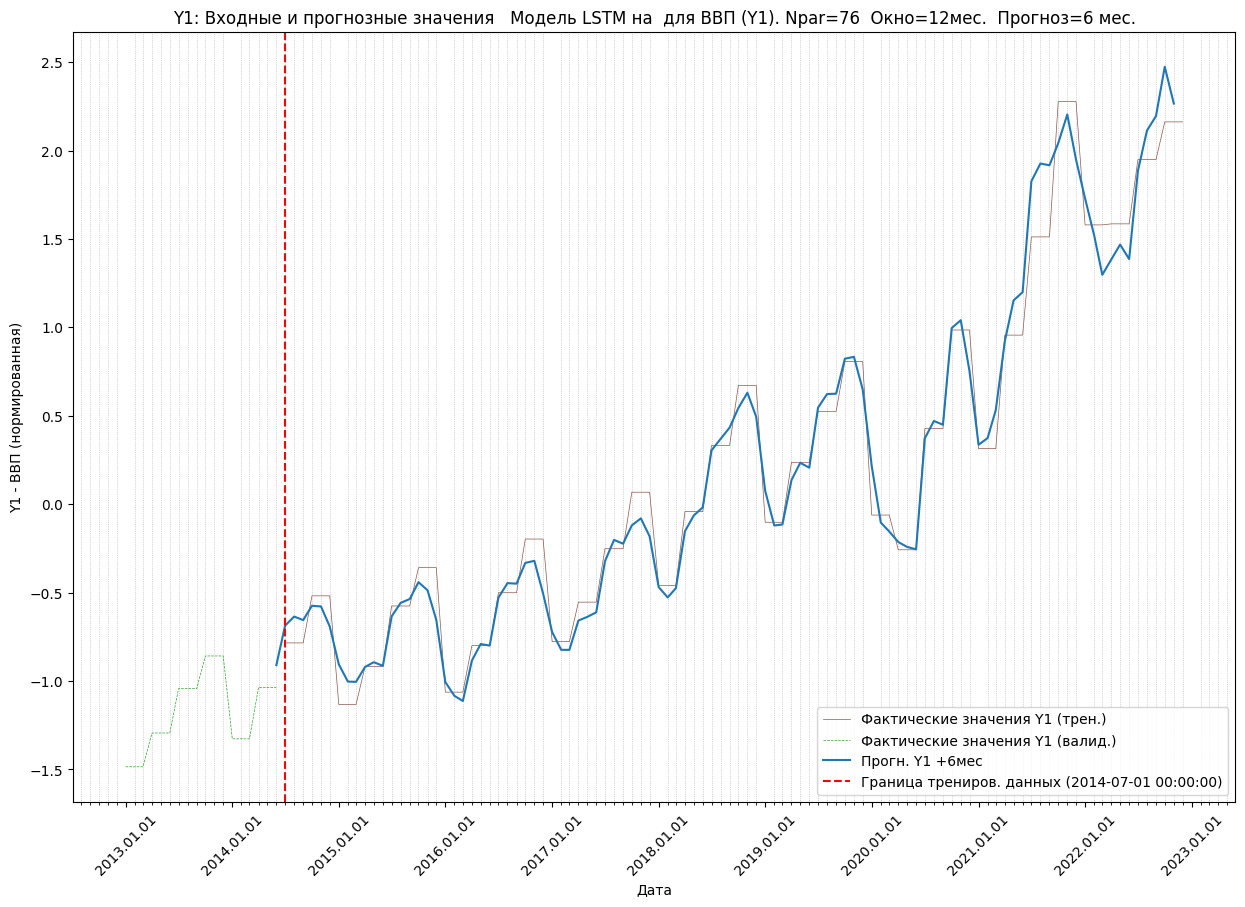

In [ ]:
#"Графики прогнозов"

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def predict_multistep(model, X_input):
    predictions = model.predict(X_input[np.newaxis, ...],verbose=0)
    return predictions[0].reshape(-1, Nout)

# Объедините все массивы временных меток и данные Y
# timestamps   - временные метки всего массива
# Создайте переменную timestamps с временными метками только для данных X
#timestamps = timestamps[:len(X)]
#all_Y = np.concatenate((y_train_temp, y_val, y_test))

# Получить прогнозы для всех данных
all_predictions = np.array([predict_multistep(model, x) for x in X])

# Разделить прогнозы на Y1 и Y2
predicted_Y1 = all_predictions[:, :, 0]
true_Y1 = y[:, 0]

# Создать график
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10), sharex=True)

# График истинных значений и прогнозов для Y1
color = 'tab:brown'
color_val = 'tab:green'
#ax1.plot(timestamps[window_size+1:-2], true_Y1[:,0],linestyle='dotted', label='True Y1')
ax1.plot(train_df.index, train_df['Y1'],linewidth=0.5, color=color, label='Фактические значения Y1 (трен.)')
ax1.plot(val_df.index, val_df['Y1'], linewidth=0.5,color=color_val,linestyle='dashed', label='Фактические значения Y1 (валид.)')
#ax1.plot(test_df.index, test_df['Y1'], linewidth=0.5,color=color,linestyle='dotted', label='Фактические значения Y1 (тест.)')

ax1.plot(timestamps[window_size+start_ahead:-1], predicted_Y1[:,0], label='Прогн. Y1 +6мес')
#ax1.plot(timestamps[window_size+1:-(steps_ahead-1)], predicted_Y1[:,0], label='Прогн. Y1 +1мес')
#ax1.plot(timestamps[window_size+2:-(steps_ahead-2)], predicted_Y1[:,1], label='Прогн. Y1 +2мес')
#ax1.plot(timestamps[window_size+3:-(steps_ahead-3)], predicted_Y1[:,1], label='Прогн. Y1 +3мес')
#ax1.plot(timestamps[window_size+4:-(steps_ahead-4)], predicted_Y1[:,1], label='Прогн. Y1 +4мес')
#ax1.plot(timestamps[window_size+5:-(steps_ahead-5)], predicted_Y1[:,1], label='Прогн. Y1 +5мес')
#ax1.plot(timestamps[window_size+steps_ahead:], predicted_Y1[:,2], label='Прогн. Y1 +6мес')
ax1.set_title(f'Y1: Входные и прогнозные значения   Модель LSTM на  для ВВП Y1,Y2. Npar={Nparam}  Окно={window_size}мес.  Прогноз={steps_ahead} мес.')
 
# Граница между прогнозом и данными
# Граница между прогнозом и данными
if (swap_trai_val==False): split_date = val_df.index[0]
else:                     split_date = train_df.index[0]

ax1.axvline(x=split_date, color='red', linestyle='--', label=f'Граница трениров. данных ({split_date})')
# Граница между прогнозом и данными
split_date = test_df.index[0]
#ax1.axvline(x=split_date, color='blue', linestyle='--', label=f'Граница тестовых данных ({split_date})')
ax1.legend()
ax1.set_ylabel("Y1 - ВВП (нормированная)")


plt.xlabel('Дата')
plt.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.grid(which='minor', linestyle=':', linewidth='0.5')

# Отображение промежуточной сетки
#ax1.grid(which='minor', linestyle=':', linewidth='0.5')



plt.show()


##8.2  LSTM  модель  для Инфляции по выбранным параметрам

###8.2.1  Подготовка дата сета

In [ ]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Создание классов для масштабирование данных
scalerX_Inf = StandardScaler()
scalerY_Inf = StandardScaler()

In [ ]:
ValidTestPart=0.15
Ndrop_out=110
swap_trai_val=False
#swap_trai_val=True
Xin = X2.iloc[:, :]  # Входящие данные для Инфляции . Включим в X сами значения прогнозируемых параметров
yin = y2.iloc[:]  # Целевой столбец  инфлиции
Nparam=Xin.shape[1]
# Создайте переменную timestamps с временными метками
timestamps = data.index

# Масштабирование данных
scaled_dataX2 = scalerX_Inf.fit_transform(Xin)
# Выделяем  новый скалер только для первого столбца (Y1)
scalerY_Inf.mean_ = scalerX_Inf.mean_[0].reshape(-1, 1)
scalerY_Inf.var_ = scalerX_Inf.var_[0].reshape(-1, 1)
scalerY_Inf.scale_ = scalerX_Inf.scale_[0].reshape(-1, 1)

scaled_dataY2= (scaled_dataX2[:,0]) #.reshape(-1, 1)
#Проверка
original_data = scalerY_Inf.inverse_transform(scaled_dataY2.reshape(-1,1))

# Отсечем турбулентный участок
scaled_dataX2=scaled_dataX2[:Ndrop_out,:]
scaled_dataY2=scaled_dataY2[:Ndrop_out]
timestamps=timestamps[:Ndrop_out]


if (swap_trai_val==False):
   X_train_temp, X_val_temp,y_train_temp, y_val_temp, index_train_temp, timestamp_index_val = train_test_split(scaled_dataX2, scaled_dataY2, timestamps, test_size=ValidTestPart, shuffle=False)
else :
   X_val_temp,X_train_temp, y_val_temp, y_train_temp, timestamp_index_val, index_train_temp = train_test_split(scaled_dataX2, scaled_dataY2, timestamps, test_size=1-ValidTestPart, shuffle=False)


# Создание датафреймов для обучающей, валидационной и тестовой выборок с учетом временных меток
train_df = pd.DataFrame(y_train_temp, index=index_train_temp, columns=['Y1'])
val_df = pd.DataFrame(y_val_temp, index=timestamp_index_val, columns=['Y1'])

train_df_x = pd.DataFrame(X_train_temp, index=index_train_temp, columns=Xin.columns)
val_df_x = pd.DataFrame(X_val_temp, index=timestamp_index_val, columns=Xin.columns)


In [ ]:
# Нарезка слайсов
window_size = 12
start_ahead = 5
steps_ahead = 6

X, y = create_dataset_one_step(scaled_dataX2, scaled_dataY2, window_size, start_ahead, steps_ahead)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= ValidTestPart , shuffle=False)

if (swap_trai_val==False):  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= ValidTestPart , shuffle=False)
else:  X_val, X_train, y_val , y_train = train_test_split(X, y, test_size=1-ValidTestPart, shuffle=False)


for item1, y_transformed_val in zip(y, scalerY_Inf.inverse_transform(y.reshape(-1, 1))):
    print(item1, ' \t', y_transformed_val)

[0.05596901]  	 [1.0062]
[-0.09938981]  	 [1.0049]
[-0.39815678]  	 [1.0024]
[0.09182105]  	 [1.0065]
[0.29498259]  	 [1.0082]
[0.84471381]  	 [1.0128]
[2.44610477]  	 [1.0262]
[3.91603826]  	 [1.0385]
[1.96807762]  	 [1.0222]
[0.76105906]  	 [1.0121]
[-0.13524185]  	 [1.0046]
[-0.26669931]  	 [1.0035]
[-0.45791018]  	 [1.0019]
[0.27108123]  	 [1.008]
[-0.26669931]  	 [1.0035]
[-0.00378438]  	 [1.0057]
[0.19937716]  	 [1.0074]
[0.21132784]  	 [1.0075]
[0.23522919]  	 [1.0077]
[0.46229209]  	 [1.0096]
[0.06791969]  	 [1.0063]
[-0.13524185]  	 [1.0046]
[-0.15914321]  	 [1.0044]
[-0.19499524]  	 [1.0041]
[-0.25474864]  	 [1.0036]
[-0.03963642]  	 [1.0054]
[-0.67302239]  	 [1.0001]
[-0.48181153]  	 [1.0017]
[-0.17109388]  	 [1.0043]
[-0.15914321]  	 [1.0044]
[-0.20694592]  	 [1.004]
[0.05596901]  	 [1.0062]
[-0.42205814]  	 [1.0022]
[-0.52961425]  	 [1.0013]
[-0.29060067]  	 [1.0033]
[-0.24279796]  	 [1.0037]
[0.04401833]  	 [1.0061]
[-0.60131832]  	 [1.0007]
[-1.33030973]  	 [0.9946]
[-0.

###8.2.2  Создание модели

In [ ]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.optimizers import Adam
model = Sequential([
    LSTM(int(1*Nparam), input_shape=(window_size, X_train.shape[2]), return_sequences=False),
    Dropout(0.40),
   # LSTM(2, return_sequences= False),
   # Dropout(0.3),
    Dense(Nout * (steps_ahead-start_ahead)),
    #Reshape(((steps_ahead-start_ahead), Nout))
])


###8.2.3  Обучение модели

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

#from tensorflow.keras.callbacks import ReduceLROnPlateau
initial_learning_rate = 0.001
epochs = 2*80
# Создаем оптимизатор Adam с начальным значением скорости обучения
optimizer = Adam(learning_rate=initial_learning_rate)

#RMSprop: Это оптимизатор, который применяет адаптивные скорости обучения для каждого параметра. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

#SGD: Стохастический градиентный спуск - классический оптимизатор для обучения нейронных сетей. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9)

#Adagrad: Этот оптимизатор адаптирует скорость обучения для каждого параметра на основе истории градиентов. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)

#Adadelta: Этот оптимизатор также адаптирует скорость обучения на основе истории градиентов, но с использованием нескольких последних градиентов. Можно использовать следующую строку для компиляции модели:
#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
# Компилируем модель с оптимизатором Adam
#model.compile(optimizer=optimizer, loss='mse')

model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 41)                13612     
                                                                 
 dropout_4 (Dropout)         (None, 41)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 42        
                                                                 
Total params: 13,654
Trainable params: 13,654
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Калбэк функция для сохранения лучших моделей
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback

class SaveBestModelWithValLoss(Callback):
    def __init__(self, output_dir):
        super().__init__()
        self.output_dir = output_dir
        self.best_val_loss = float("inf")

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_loss = logs.get("val_loss")
        if val_loss is not None and val_loss < self.best_val_loss:
            self.best_val_loss = val_loss
            model_path = os.path.join(self.output_dir, f"Inf_best_model_nparam_{Nparam}_val_loss_{val_loss:.5f}_epoch_{epoch}.h5")
            self.model.save(model_path)
            print(f"Model saved as {model_path}")

# Создайте экземпляр класса SaveBestModelWithValLoss
save_best_model_with_val_loss = SaveBestModelWithValLoss(output_dir=f"/content/drive/MyDrive/Стажировка_РАН/models_Inf_{Nparam}")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, verbose=1, min_lr=1e-6)



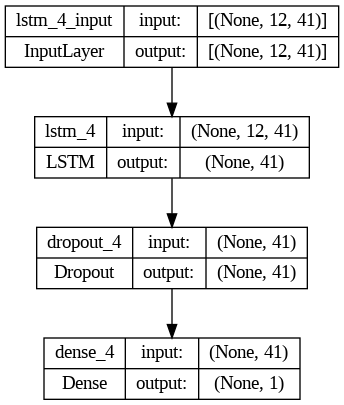

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file=f"/content/drive/MyDrive/Стажировка_РАН/models_Inf_{Nparam}/best_model.png", show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_Inf.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

#history = model.fit(X_train, y_train, epochs=80, batch_size=1, validation_data=(X_val, y_val), callbacks=[reduce_lr,  model_checkpoint, save_best_model_with_val_loss])
history = model.fit(X_train, y_train, epochs=80, batch_size=1, validation_data=(X_val, y_val), callbacks=[  model_checkpoint, save_best_model_with_val_loss])
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=1, validation_data=(X_val, y_val), callbacks=[reduce_lr, model_checkpoint, save_best_model_with_val_loss])

#model.load('best_model_VVP.h5')
model.load_weights('best_model_Inf.h5')



Epoch 1/80
74/78 [===========================>..] - ETA: 0s - loss: 0.5350
Epoch 1: val_loss improved from inf to 0.13730, saving model to best_model_Inf.h5
Model saved as /content/drive/MyDrive/Стажировка_РАН/models_Inf_41/Inf_best_model_nparam_41_val_loss_0.13730_epoch_0.h5
78/78 [==============================] - 6s 32ms/step - loss: 0.5138 - val_loss: 0.1373
Epoch 2/80
78/78 [==============================] - ETA: 0s - loss: 0.4629
Epoch 2: val_loss did not improve from 0.13730
78/78 [==============================] - 0s 5ms/step - loss: 0.4629 - val_loss: 0.2219
Epoch 3/80
74/78 [===========================>..] - ETA: 0s - loss: 0.3225
Epoch 3: val_loss improved from 0.13730 to 0.12074, saving model to best_model_Inf.h5
Model saved as /content/drive/MyDrive/Стажировка_РАН/models_Inf_41/Inf_best_model_nparam_41_val_loss_0.12074_epoch_2.h5
78/78 [==============================] - 3s 33ms/step - loss: 0.3302 - val_loss: 0.1207
Epoch 4/80
73/78 [===========================>..] - ETA: 

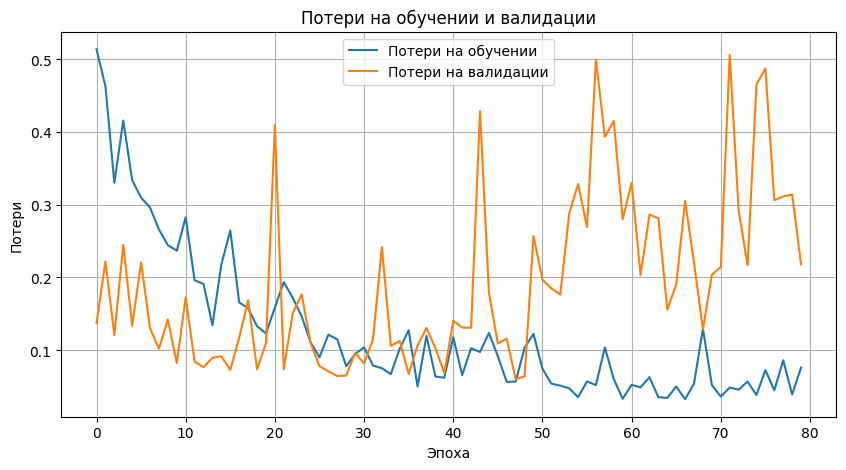

<Figure size 640x480 with 0 Axes>

In [ ]:
# Вывод графика результатов обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери на обучении и валидации')
plt.grid()
plt.show()

# Сохранение графика в файл
plt.savefig(f"/content/drive/MyDrive/Стажировка_РАН/models_Inf_{Nparam}/models_Inf_{Nparam}_loss_plot.png")

###8.2.4  Вывод графиков прогноза

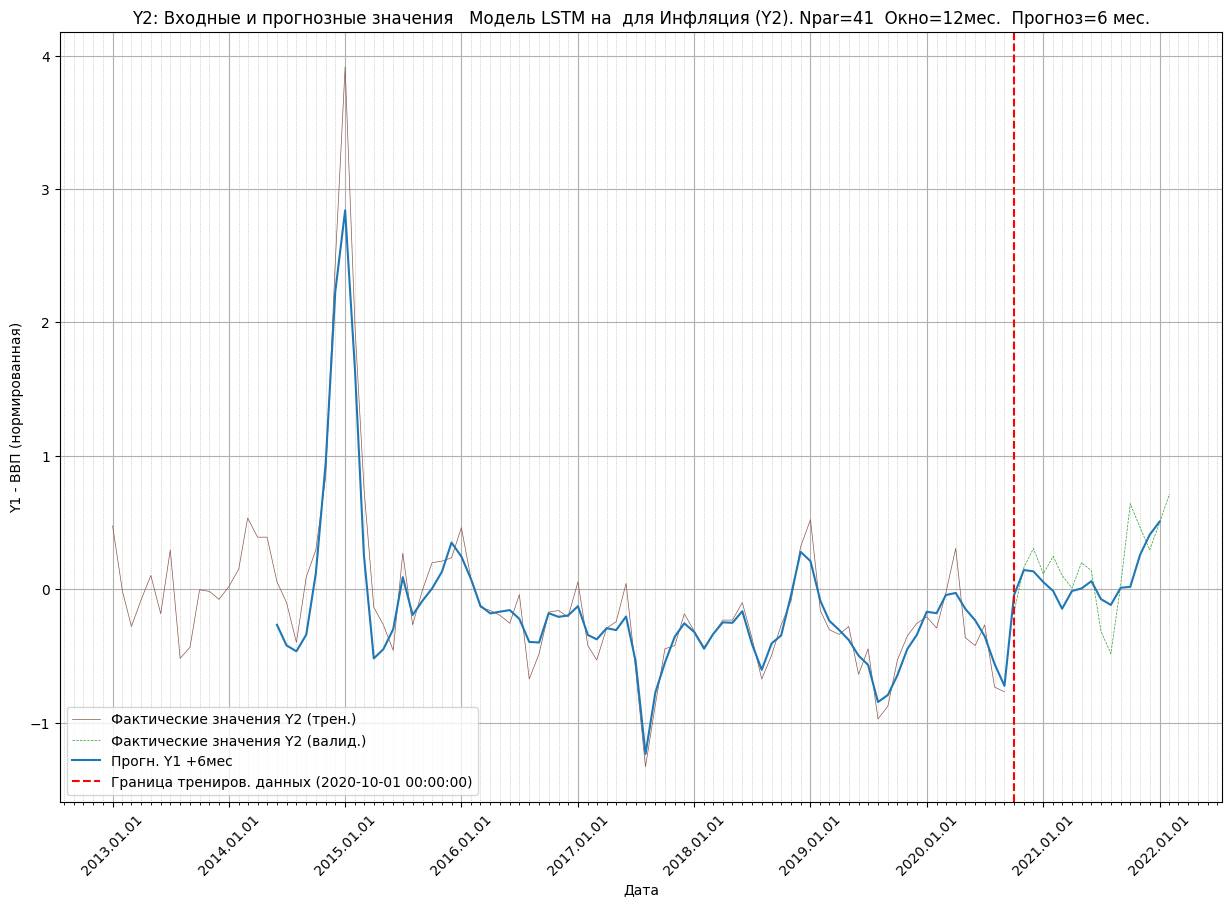

<Figure size 640x480 with 0 Axes>

In [ ]:
#"Графики прогнозов"

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def predict_multistep(model, X_input):
    predictions = model.predict(X_input[np.newaxis, ...],verbose=0)
    return predictions[0].reshape(-1, Nout)

# Получить прогнозы для всех данных
all_predictions = np.array([predict_multistep(model, x) for x in X])

predicted_Y2 = all_predictions[:, :, 0]
true_Y2 = y[:, 0]

# Создать график
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10), sharex=True)

# График истинных значений и прогнозов для Y1
color = 'tab:brown'
color_val = 'tab:green'
#ax1.plot(timestamps[window_size+1:-2], true_Y1[:,0],linestyle='dotted', label='True Y1')
ax1.plot(train_df.index, train_df['Y1'],linewidth=0.5, color=color, label='Фактические значения Y2 (трен.)')
ax1.plot(val_df.index, val_df['Y1'], linewidth=0.5,color=color_val,linestyle='dashed', label='Фактические значения Y2 (валид.)')
#ax1.plot(test_df.index, test_df['Y1'], linewidth=0.5,color=color,linestyle='dotted', label='Фактические значения Y1 (тест.)')

ax1.plot(timestamps[window_size+start_ahead:-1], predicted_Y2[:,0], label='Прогн. Y1 +6мес')
#ax1.plot(timestamps[window_size+1:-(steps_ahead-1)], predicted_Y1[:,0], label='Прогн. Y1 +1мес')
#ax1.plot(timestamps[window_size+2:-(steps_ahead-2)], predicted_Y1[:,1], label='Прогн. Y1 +2мес')
#ax1.plot(timestamps[window_size+3:-(steps_ahead-3)], predicted_Y1[:,1], label='Прогн. Y1 +3мес')
#ax1.plot(timestamps[window_size+4:-(steps_ahead-4)], predicted_Y1[:,1], label='Прогн. Y1 +4мес')
#ax1.plot(timestamps[window_size+5:-(steps_ahead-5)], predicted_Y1[:,1], label='Прогн. Y1 +5мес')
#ax1.plot(timestamps[window_size+steps_ahead:], predicted_Y1[:,2], label='Прогн. Y1 +6мес')
ax1.set_title(f'Y2: Входные и прогнозные значения   Модель LSTM на  для Инфляция (Y2). Npar={Nparam}  Окно={window_size}мес.  Прогноз={steps_ahead} мес.')
 
# Граница между прогнозом и данными
# Граница между прогнозом и данными
if (swap_trai_val==False): split_date = val_df.index[0]
else:                     split_date = train_df.index[0]

ax1.axvline(x=split_date, color='red', linestyle='--', label=f'Граница трениров. данных ({split_date})')
# Граница между прогнозом и данными
split_date = test_df.index[0]
#ax1.axvline(x=split_date, color='blue', linestyle='--', label=f'Граница тестовых данных ({split_date})')
ax1.legend()
ax1.set_ylabel("Y1 - ВВП (нормированная)")


plt.xlabel('Дата')
plt.xticks(rotation=45)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.grid(which='minor', linestyle=':', linewidth='0.5')

# Отображение промежуточной сетки
#ax1.grid(which='minor', linestyle=':', linewidth='0.5')
plt.grid()


plt.show()
# Сохранение графика в файл
plt.savefig(f"/content/drive/MyDrive/Стажировка_РАН/models_Inf_{Nparam}/models_Inf_{Nparam}_predict_plot.png")
